## `inatall and imports'


In [ ]:
!pip install tensorflow # Install PyTorch with CUDA support
!pip install torch torchvision torchaudio
!pip uninstall torch-scatter torch-sparse torch-cluster torch-spline-conv -y
!pip uninstall torch-geometric -y


In [ ]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")


PyTorch version: 2.4.1+cu121
CUDA available: True
CUDA version: 12.1


In [ ]:
# Install PyTorch Geometric dependencies with pre-built binaries
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-geometric
!pip install torch-geometric
!pip install torchinfo


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.6/886.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.4 MB/s eta 0:00:00


In [ ]:
import torch_geometric
from torch_geometric.data import Data
print("Torch Geometric version:", torch_geometric.__version__)


/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

Torch Geometric version: 2.6.1


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate

## Data Processing

In [ ]:
weather_data = pd.read_csv('Datasets/all_data2001_2023_weather/complete_KNN_dataset_corrected.csv')
topo_features = pd.read_csv('Datasets/topological_features_365d_gpus.csv')
soil_data= pd.read_csv('Datasets/table_static_data_selected.csv')

yield_soil = pd.read_csv('Datasets/corn2001_2023_yield_data.csv')
yield_data = yield_soil[['Year', 'County', 'Value']]

# yield_data = yield_data[~((yield_data['Year'] == 2012) & (yield_data['Value'] < 90))]
yield_data = yield_data[~(yield_data['County'] =='OTHER (COMBINED) COUNTIES')]
yield_data= yield_data.rename(columns={'County': 'county'})
soil_data = soil_data.rename(columns={'NAME_U': 'county'})
soil_data = soil_data[['county', 'aws0_5', 'aws5_20',
       'aws20_50', 'aws0_20', 'soc0_20', 'soc0_30',
       'nccpi3corn', 'slope_r', 'elev_r',
        'W_avg_silt', 'W_avg_clay']]
yield_data = yield_data.rename(columns={'Year': 'year'})
weather_data = weather_data.rename(columns={'Date': 'date'})
topo_features = topo_features.rename(columns={'County': 'county'})

In [ ]:
yield_data = yield_data.rename(columns={'Value': 'value_old'})

In [ ]:
yield_data['Value'] = yield_data['value_old']+ (2023-yield_data['year'])*2.3373

In [ ]:
yield_data

,year,county,value_old,Value
0,2023,OTHER COUNTIES,202.5,202.5000
1,2023,BARTHOLOMEW,195.0,195.0000
2,2023,BOONE,207.2,207.2000
3,2023,CLINTON,234.4,234.4000
4,2023,DECATUR,221.9,221.9000
...,...,...,...,...
1980,2001,PUTNAM,157.8,209.2206
1981,2001,TIPPECANOE,157.5,208.9206
1982,2001,VERMILLION,160.6,212.0206
1983,2001,VIGO,148.7,200.1206


In [ ]:
len(yield_data.county.unique())

93

In [ ]:
# Assuming 'yield_data' is already loaded, let's find duplicate (county, year) pairs.

# Identify duplicate county-year pairs
duplicate_pairs = yield_data[yield_data.duplicated(subset=['county', 'year'], keep=False)]

# Display the duplicate pairs to the user
duplicate_pairs


,year,county,value_old,Value


In [ ]:
yield_data

,year,county,value_old,Value
0,2023,OTHER COUNTIES,202.5,202.5000
1,2023,BARTHOLOMEW,195.0,195.0000
2,2023,BOONE,207.2,207.2000
3,2023,CLINTON,234.4,234.4000
4,2023,DECATUR,221.9,221.9000
...,...,...,...,...
1980,2001,PUTNAM,157.8,209.2206
1981,2001,TIPPECANOE,157.5,208.9206
1982,2001,VERMILLION,160.6,212.0206
1983,2001,VIGO,148.7,200.1206


In [ ]:
import geopandas as gpd

# Load the county shapefile
counties = gpd.read_file('Datasets/Census_County_TIGER00_IN.shp')
counties = counties.rename(columns={'NAME_U': 'county'})


In [ ]:
import pandas as pd
'''
# Assuming df_yield is your yield dataframe
# And all_counties is a list of all county names in your region/state
all_counties = soil_data['county'].unique()  # Use the list of all county names from weather_data

# Assuming 'Year' and 'county' are the columns that list the year and county names in df_yield
# Iterate over each unique year in the yield dataset
years = yield_data['year'].unique()

new_rows = []

for year in years:
    # Step 1: Filter data for the specific year
    year_data = yield_data[yield_data['year'] == year]

    # Identify counties already present for this specific year
    present_counties = year_data['county'].unique().tolist()

    # Step 2: Identify the missing counties for this specific year
    missing_counties = [county for county in all_counties if county not in present_counties]

    # Step 3: Extract the "Other counties" data from the year-specific dataframe
    # Handle different variations of the "Other counties" labels
    other_county_data = year_data[
        year_data['county'].str.contains(r'OTHER.*COUNTIES', case=False, na=False)
    ]

    # Ensure there is "Other counties" data for this year
    if other_county_data.empty:
        print(f"No 'Other counties' row found for year {year}.")
    else:
        # Step 4: Create new rows for the missing counties for this year
        for _, row in other_county_data.iterrows():
            for missing_county in missing_counties:
                new_row = row.copy()
                new_row['county'] = missing_county
                new_rows.append(new_row)

# Step 5: Convert the list of new rows to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Step 6: Append new rows to the original yield_data
yield_data_expanded = pd.concat([yield_data, new_rows_df], ignore_index=True)

# Step 7: Reset the index if needed
yield_data_expanded.reset_index(drop=True, inplace=True)

# Print to confirm changes (optional)
yield_data_expanded
'''


'\n# Assuming df_yield is your yield dataframe\n# And all_counties is a list of all county names in your region/state\nall_counties = soil_data[\'county\'].unique()  # Use the list of all county names from weather_data\n\n# Assuming \'Year\' and \'county\' are the columns that list the year and county names in df_yield\n# Iterate over each unique year in the yield dataset\nyears = yield_data[\'year\'].unique()\n\nnew_rows = []\n\nfor year in years:\n    # Step 1: Filter data for the specific year\n    year_data = yield_data[yield_data[\'year\'] == year]\n\n    # Identify counties already present for this specific year\n    present_counties = year_data[\'county\'].unique().tolist()\n\n    # Step 2: Identify the missing counties for this specific year\n    missing_counties = [county for county in all_counties if county not in present_counties]\n\n    # Step 3: Extract the "Other counties" data from the year-specific dataframe\n    # Handle different variations of the "Other counties" lab

In [ ]:
valid_counties = set(yield_data['county']).intersection(
    set(soil_data['county']),
    set(weather_data['county']),
    set(topo_features['county']),
    set(weather_data['county'])
)

len(valid_counties)

80

In [ ]:
# Get the unique counties from weather_data
# valid_counties = weather_data['county'].unique()

# Filter soil_data to include only counties present in weather_data
soil_data_filtered = soil_data[soil_data['county'].isin(valid_counties)]
topo_features_filtered = topo_features[topo_features['county'].isin(valid_counties)]
# Filter yield_data to include only counties present in weather_data
yield_data_filtered = yield_data[yield_data['county'].isin(valid_counties)]
weather_data_filtered = weather_data[weather_data['county'].isin(valid_counties)]
# Now you have filtered versions of both soil_data and yield_data that contain only relevant counties
print(f"Filtered soil_data contains {len(soil_data_filtered)} rows")
print(f"Filtered yield_data contains {len(yield_data_filtered)} rows")
print(f"Filtered weather_data contains {len(weather_data_filtered)} rows")
print(f"Filtered topo_features contains {len(topo_features_filtered)} rows")

Filtered soil_data contains 80 rows
Filtered yield_data contains 1700 rows
Filtered weather_data contains 529693 rows
Filtered topo_features contains 1441 rows


In [ ]:
import pandas as pd

# Assuming weather_data is already loaded
weather_data_filtered['date'] = pd.to_datetime(weather_data_filtered['date'])  # Ensure 'Date' column is in datetime format
weather_data_filtered['year'] = weather_data_filtered['date'].dt.year          # Extract year
weather_data_filtered['month'] = weather_data_filtered['date'].dt.month        # Extract month

# Filter weather data for April to August
weather_data_filtered['date'] = pd.to_datetime(weather_data_filtered['date'])
weather_data_filtered = weather_data_filtered[(weather_data_filtered['date'].dt.month >= 4) & (weather_data_filtered['date'].dt.month <= 8)]

# Check if any data remains after filtering
if weather_data_filtered.empty:
    print("Warning: No data found for the April–August period.")
else:
    print(f"Data retained for April–August: {len(weather_data_filtered)} rows")



Data retained for April–August: 221916 rows


<ipython-input-88-40795f34f49f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_filtered['date'] = pd.to_datetime(weather_data_filtered['date'])  # Ensure 'Date' column is in datetime format
<ipython-input-88-40795f34f49f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_filtered['year'] = weather_data_filtered['date'].dt.year          # Extract year
<ipython-input-88-40795f34f49f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
# Get the unique counties from each dataset
weather_counties = set(weather_data_filtered['county'].unique())
soil_counties = set(soil_data_filtered['county'].unique())  # Use the filtered version
yield_counties = set(yield_data_filtered['county'].unique())  # Use the filtered version
topo_features_counties = set(topo_features_filtered['county'].unique())
# Check for differences
counties_in_weather_not_in_soil = weather_counties - soil_counties
counties_in_soil_not_in_weather = soil_counties - weather_counties

counties_in_weather_not_in_yield = weather_counties - yield_counties
counties_in_yield_not_in_weather = yield_counties - weather_counties

counties_in_weather_not_in_topo = weather_counties - topo_features_counties
counties_in_topo_not_in_weather = topo_features_counties - weather_counties

counties_in_yield_not_in_topo = yield_counties - topo_features_counties
counties_in_topo_not_in_yield = topo_features_counties - yield_counties

# Print the results
print(f"Counties in weather data but not in soil data: {counties_in_weather_not_in_soil}")
print(f"Counties in soil data but not in weather data: {counties_in_soil_not_in_weather}")

print(f"Counties in weather data but not in yield data: {counties_in_weather_not_in_yield}")
print(f"Counties in yield data but not in weather data: {counties_in_yield_not_in_weather}")

print(f"Counties in weather data but not in topo features: {counties_in_weather_not_in_topo}")
print(f"Counties in topo features but not in weather data: {counties_in_topo_not_in_weather}")

print(f"Counties in yield data but not in topo features: {counties_in_yield_not_in_topo}")
print(f"Counties in topo features but not in yield data: {counties_in_topo_not_in_yield}")



Counties in weather data but not in soil data: set()
Counties in soil data but not in weather data: set()
Counties in weather data but not in yield data: set()
Counties in yield data but not in weather data: set()
Counties in weather data but not in topo features: set()
Counties in topo features but not in weather data: set()
Counties in yield data but not in topo features: set()
Counties in topo features but not in yield data: set()


In [ ]:
# Check common counties and years
weather_data_filtered['county'] = weather_data_filtered['county'].str.strip()  # clean up names if needed
topo_features_filtered['county'] = topo_features_filtered['county'].str.strip()
yield_data_filtered['county'] = yield_data_filtered['county'].str.strip()
soil_data_filtered['county'] = soil_data_filtered['county'].str.strip()

# Check if all counties are present in each dataset
print(set(weather_data_filtered['county']).intersection(set(topo_features['county'])))
print(set(weather_data_filtered['county']).intersection(set(yield_data['county'])))
print(set(weather_data_filtered['county']).intersection(set(soil_data['county'])))


{'MONTGOMERY', 'BOONE', 'BENTON', 'PERRY', 'MARSHALL', 'SHELBY', 'OWEN', 'FOUNTAIN', 'ELKHART', 'SPENCER', 'JACKSON', 'SCOTT', 'GRANT', 'FRANKLIN', 'STEUBEN', 'VIGO', 'RUSH', 'MARION', 'DUBOIS', 'JAY', 'SWITZERLAND', 'VANDERBURGH', 'PUTNAM', 'DECATUR', 'MARTIN', 'CLAY', 'PULASKI', 'TIPTON', 'LAGRANGE', 'BARTHOLOMEW', 'MONROE', 'JASPER', 'ALLEN', 'HENRY', 'HAMILTON', 'RANDOLPH', 'RIPLEY', 'PIKE', 'MORGAN', 'VERMILLION', 'CASS', 'ORANGE', 'ADAMS', 'CLINTON', 'JENNINGS', 'WABASH', 'WELLS', 'CRAWFORD', 'DAVIESS', 'STARKE', 'KOSCIUSKO', 'HANCOCK', 'PORTER', 'NOBLE', 'GIBSON', 'LAWRENCE', 'FULTON', 'UNION', 'LA PORTE', 'WARRICK', 'WASHINGTON', 'WHITE', 'JOHNSON', 'PARKE', 'MADISON', 'SULLIVAN', 'TIPPECANOE', 'HUNTINGTON', 'BLACKFORD', 'HOWARD', 'NEWTON', 'DELAWARE', 'DEARBORN', 'LAKE', 'POSEY', 'WHITLEY', 'KNOX', 'JEFFERSON', 'CARROLL', 'WAYNE'}
{'MONTGOMERY', 'BOONE', 'BENTON', 'PERRY', 'MARSHALL', 'SHELBY', 'OWEN', 'FOUNTAIN', 'ELKHART', 'SPENCER', 'JACKSON', 'SCOTT', 'GRANT', 'FRANKLIN', 

<ipython-input-90-34f1297e1bdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topo_features_filtered['county'] = topo_features_filtered['county'].str.strip()
<ipython-input-90-34f1297e1bdc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_data_filtered['county'] = yield_data_filtered['county'].str.strip()
<ipython-input-90-34f1297e1bdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
weather_data_filtered

,date,county,mergedmax_temp,mergedmean_temp,mergedmin_temp,merged_precip,gdd,year,month
90,2001-04-01,ADAMS,48.0,41.0,34.0,0.190000,0.0,2001,4
91,2001-04-02,ADAMS,59.0,43.5,28.0,0.000000,0.0,2001,4
92,2001-04-03,ADAMS,54.0,47.0,40.0,0.000000,0.0,2001,4
93,2001-04-04,ADAMS,59.0,45.5,32.0,0.000000,0.0,2001,4
94,2001-04-05,ADAMS,73.0,53.0,33.0,0.000000,3.0,2001,4
...,...,...,...,...,...,...,...,...,...
535044,2023-08-27,WHITLEY,75.0,64.0,53.0,0.000000,14.0,2023,8
535045,2023-08-28,WHITLEY,76.0,63.5,51.0,0.000000,13.5,2023,8
535046,2023-08-29,WHITLEY,80.0,65.5,51.0,0.020000,15.5,2023,8
535047,2023-08-30,WHITLEY,71.0,59.5,48.0,0.071667,9.5,2023,8


In [ ]:
# Ensure weather_features columns are present and apply MinMaxScaler only if data exists
weather_features = ['mergedmax_temp', 'mergedmean_temp', 'mergedmin_temp', 'merged_precip', 'gdd']
missing_features = [feature for feature in weather_features if feature not in weather_data.columns]
if missing_features:
    print(f"Missing weather features: {missing_features}")
else:
    scaler = MinMaxScaler()
    weather_data[weather_features] = scaler.fit_transform(weather_data[weather_features])
    print("Weather data scaled successfully.")
#copy this later

Weather data scaled successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Ensure consistent casing in county names
for df in [yield_data_filtered, topo_features_filtered, weather_data_filtered, soil_data_filtered]:
    df['county'] = df['county'].str.upper()

# 2. Identify common county-year pairs across yield, topo, and weather datasets
common_pairs = set(yield_data_filtered[['county', 'year']].apply(tuple, axis=1)) \
               & set(topo_features_filtered[['county', 'year']].apply(tuple, axis=1)) \
               & set(weather_data_filtered[['county', 'year']].apply(tuple, axis=1))

# 3. Filter each dataset based on common county-year pairs
yield_data_filtered = yield_data_filtered[yield_data[['county', 'year']].apply(tuple, axis=1).isin(common_pairs)]
topo_features_filtered = topo_features_filtered[topo_features_filtered[['county', 'year']].apply(tuple, axis=1).isin(common_pairs)]
weather_data_filtered = weather_data_filtered[weather_data_filtered[['county', 'year']].apply(tuple, axis=1).isin(common_pairs)]
soil_data_filtered = soil_data_filtered[soil_data_filtered['county'].isin(yield_data_filtered['county'].unique())]  # Soil by county only

# 4. Filter weather data to only include April-August entries
weather_data_filtered['date'] = pd.to_datetime(weather_data_filtered['date'])
weather_data_filtered = weather_data_filtered[(weather_data_filtered['date'].dt.month >= 4) &
                                              (weather_data_filtered['date'].dt.month <= 8)]

# 5. Scale features
scaler_weather = MinMaxScaler()
scaler_topo = MinMaxScaler()
scaler_soil = MinMaxScaler()

# Define feature columns
weather_features = ['mergedmax_temp', 'mergedmean_temp', 'mergedmin_temp', 'merged_precip', 'gdd']
topo_features_cols = topo_features_filtered.columns[2:]  # All columns except county, year
soil_features = soil_data_filtered.columns[1:]  # All columns except county

# Apply scaling
weather_data_filtered[weather_features] = scaler_weather.fit_transform(weather_data_filtered[weather_features])
topo_features_filtered[topo_features_cols] = scaler_topo.fit_transform(topo_features_filtered[topo_features_cols])
soil_data_filtered[soil_features] = scaler_soil.fit_transform(soil_data_filtered[soil_features])

# 6. Organize weather data into sequences for each county-year pair
weather_sequences = {}
for (county, year), group in weather_data_filtered.groupby(['county', 'year']):
    sequence = group[weather_features].values
    if len(sequence) == 153:  # Ensure the sequence length is consistent (153 days for April-August)
        weather_sequences[(county, year)] = sequence

# 7. Convert topo and soil data into dictionary lookups
topo_features_dict = topo_features_filtered.set_index(['county', 'year']).to_dict(orient='index')
soil_data_dict = soil_data_filtered.set_index('county').to_dict(orient='index')

# Now, `weather_sequences`, `topo_features_dict`, and `soil_data_dict` contain data aligned by county and year.
# Use these in the model to ensure correct data alignment.


<ipython-input-93-f1db18276b76>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['county'] = df['county'].str.upper()
<ipython-input-93-f1db18276b76>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yield_data_filtered = yield_data_filtered[yield_data[['county', 'year']].apply(tuple, axis=1).isin(common_pairs)]
<ipython-input-93-f1db18276b76>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_filtered['date'] = pd.to_datetime(weather_data_filtered['date'])
<ip

## the model Multi model approach

you dont need to train the model, at the end, you load the model and evaluate

In [ ]:
import torch
import torch.nn as nn
'''
class WeatherLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, lstm_output_dim, num_layers=2):
        super(WeatherLSTM, self).__init__()

        # First LSTM layer
        self.lstm1 = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Second LSTM layer
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim // 2, num_layers, batch_first=True)

        # Third LSTM layer
        # self.lstm3 = nn.LSTM(hidden_dim // 2, hidden_dim // 4, num_layers, batch_first=True)

        # Fully connected layer for the LSTM output
        self.fc = nn.Linear(hidden_dim //2, lstm_output_dim)
        self.hidden_dim = hidden_dim

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_dim)

        # Pass through the first LSTM layer
        lstm_out1, _ = self.lstm1(x)  # Shape: (batch_size, sequence_length, hidden_dim)

        # Pass through the second LSTM layer
        lstm_out2, _ = self.lstm2(lstm_out1)  # Shape: (batch_size, sequence_length, hidden_dim // 2)

        # Pass through the third LSTM layer
        # lstm_out3, _ = self.lstm3(lstm_out2)  # Shape: (batch_size, sequence_length, hidden_dim // 4)

        # Fully connected layer using the last time step's output
        out = self.fc(lstm_out2[:, -1, :])  # Shape: (batch_size, lstm_output_dim)
        return out

class TopologyFeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TopologyFeedForward, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

        self.relu = nn.ReLU()

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x  # Shape: (batch_size, output_dim)

class YieldPredictionModel(nn.Module):
    def __init__(self, weather_input_dim, weather_hidden_dim, lstm_output_dim,
                 topo_input_dim, topo_hidden_dim, topo_output_dim, soil_input_dim, final_output_dim):
        super(YieldPredictionModel, self).__init__()

        # Weather LSTM model with three LSTM layers
        self.weather_lstm = WeatherLSTM(weather_input_dim, weather_hidden_dim, lstm_output_dim)

        # Topology Feed-Forward Network
        self.topo_ffn = TopologyFeedForward(topo_input_dim, topo_hidden_dim, topo_output_dim)

        # Final fully connected layers for yield prediction
        concat_dim = lstm_output_dim + topo_output_dim + soil_input_dim
        self.fc1 = nn.Linear(concat_dim, 256)
        #self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, final_output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.bn1 = nn.BatchNorm1d(128)
        # self.bn2 = nn.BatchNorm1d(64)

    def forward(self, weather_seq, topo_features, soil_features):
        # Forward pass through weather LSTM
        weather_out = self.weather_lstm(weather_seq)

        # Forward pass through topology feed-forward network
        topo_out = self.topo_ffn(topo_features)

        # Concatenate weather, topology, and soil features
        combined = torch.cat((weather_out, topo_out, soil_features), dim=1)

        # Final prediction layers with added capacity and batch normalization
        x = self.relu(self.fc1(combined))

        # x = self.dropout(x)
        # x = self.relu(self.fc2(x))
        # x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        # x = self.dropout(x)


        output = self.fc6(x)
        return output
'''
import torch
import torch.nn as nn

class WeatherLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, lstm_output_dim, num_layers=2):
        super(WeatherLSTM, self).__init__()
        # First LSTM layer
        self.lstm1 = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # Second LSTM layer
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim // 2, num_layers, batch_first=True)
        # Fully connected layer for the LSTM output
        self.fc = nn.Linear(hidden_dim // 2, lstm_output_dim)

    def forward(self, x):
        # Pass through the first LSTM layer
        lstm_out1, _ = self.lstm1(x)
        # Pass through the second LSTM layer
        lstm_out2, _ = self.lstm2(lstm_out1)
        # Fully connected layer using the last time step's output
        out = self.fc(lstm_out2[:, -1, :])
        return out

class TopologyFeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TopologyFeedForward, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class YieldPredictionModel(nn.Module):
    def __init__(self, weather_input_dim, weather_hidden_dim, lstm_output_dim,
                 topo_input_dim, topo_hidden_dim, topo_output_dim, soil_input_dim, final_output_dim):
        super(YieldPredictionModel, self).__init__()

        # Weather LSTM model
        self.weather_lstm = WeatherLSTM(weather_input_dim, weather_hidden_dim, lstm_output_dim)
        # Topology Feed-Forward Network
        self.topo_ffn = TopologyFeedForward(topo_input_dim, topo_hidden_dim, topo_output_dim)

        # Final fully connected layers for yield prediction
        concat_dim = lstm_output_dim + topo_output_dim + soil_input_dim
        self.fc1 = nn.Linear(concat_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, final_output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.01)  # Reduced dropout

    def forward(self, weather_seq, topo_features, soil_features):
        # Forward pass through weather LSTM
        weather_out = self.weather_lstm(weather_seq)
        # Forward pass through topology feed-forward network
        topo_out = self.topo_ffn(topo_features)
        # Concatenate weather, topology, and soil features
        combined = torch.cat((weather_out, topo_out, soil_features), dim=1)
        # Final prediction layers with batch normalization and dropout
        x = self.relu(self.fc1(combined))
        x = self.dropout(x)
        x = self.relu(self.bn1(self.fc2(x)))
        x = self.relu(self.fc3(x))
        output = self.fc4(x)
        return output





Train county-year pairs: [('WELLS', 2009), ('MARSHALL', 2003), ('WELLS', 2005), ('ALLEN', 2023), ('JOHNSON', 2023), ('MONROE', 2014), ('VIGO', 2011), ('NEWTON', 2003), ('ADAMS', 2014), ('BARTHOLOMEW', 2010), ('PORTER', 2006), ('TIPTON', 2010), ('VIGO', 2017), ('BARTHOLOMEW', 2009), ('TIPTON', 2002), ('MORGAN', 2009), ('VERMILLION', 2004), ('WABASH', 2016), ('PARKE', 2009), ('CARROLL', 2006), ('VANDERBURGH', 2002), ('JASPER', 2007), ('LAWRENCE', 2001), ('MONROE', 2007), ('CASS', 2003), ('WHITLEY', 2002), ('MORGAN', 2006), ('JENNINGS', 2012), ('JAY', 2005), ('OWEN', 2018), ('VERMILLION', 2021), ('WHITLEY', 2009), ('HANCOCK', 2015), ('STARKE', 2013), ('MONROE', 2011), ('WABASH', 2009), ('VANDERBURGH', 2004), ('DUBOIS', 2016), ('PULASKI', 2002), ('LAKE', 2016), ('FOUNTAIN', 2009), ('RIPLEY', 2022), ('BOONE', 2001), ('VANDERBURGH', 2023), ('BENTON', 2003), ('PUTNAM', 2001), ('FRANKLIN', 2015), ('JACKSON', 2002), ('WABASH', 2008), ('FRANKLIN', 2012), ('KNOX', 2003), ('RUSH', 2009), ('TIPTON'

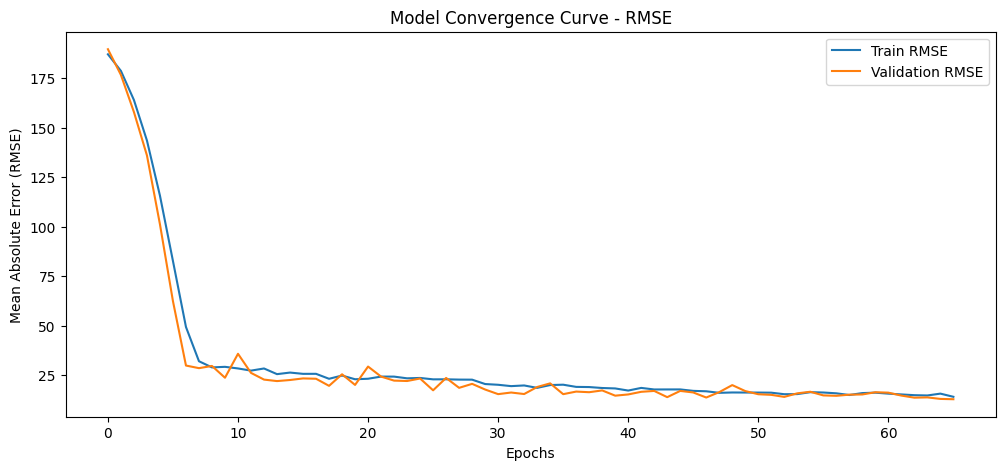

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import math
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
county_year_pairs = []

# Extract inputs and target from dictionaries and yield data
weather_inputs, topo_inputs, soil_inputs, targets = [], [], [], []

# Align features and yield values by common county-year pairs
for _, row in yield_data_filtered.iterrows():
    county, year = row['county'], row['year']

    # Check if all required data are available for the county-year pair
    if (county, year) in weather_sequences and (county, year) in topo_features_dict and county in soil_data_dict:
        weather_inputs.append(weather_sequences[(county, year)])  # Sequence data (153 days, features)
        topo_inputs.append(list(topo_features_dict[(county, year)].values()))  # Topo features
        soil_inputs.append(list(soil_data_dict[county].values()))  # Soil features
        targets.append(row['Value'])  # Yield as target
        county_year_pairs.append((county, year))

# Convert lists to tensors and move data to GPU
weather_inputs = torch.tensor(np.array(weather_inputs), dtype=torch.float32).to(device)
topo_inputs = torch.tensor(np.array(topo_inputs), dtype=torch.float32).to(device)
soil_inputs = torch.tensor(np.array(soil_inputs), dtype=torch.float32).to(device)
targets = torch.tensor(np.array(targets), dtype=torch.float32, requires_grad=False).unsqueeze(1).to(device)  # Shape (N, 1)

# Dataset and DataLoader preparation
batch_size = 32
dataset = TensorDataset(weather_inputs, topo_inputs, soil_inputs, targets)

# Train-Val-Test Split

train_dsize =  len(dataset) - 50
train_size = int(0.8 * train_dsize)
val_size = train_dsize - train_size
test_size = 50
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_indices = train_dataset.indices
val_indices = val_dataset.indices
test_indices = test_dataset.indices

train_county_years = [county_year_pairs[i] for i in train_indices]
val_county_years = [county_year_pairs[i] for i in val_indices]
test_county_years = [county_year_pairs[i] for i in test_indices]

# Validate by printing or inspecting the resulting lists
print("Train county-year pairs:", train_county_years)
print("Validation county-year pairs:", val_county_years)
print("Test county-year pairs:", test_county_years)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model, Loss, and Optimizer
weather_input_dim = weather_inputs.shape[2]
weather_hidden_dim = 128
lstm_output_dim = 32
topo_input_dim = topo_inputs.shape[1]
topo_hidden_dim = 16
topo_output_dim = 8
soil_input_dim = soil_inputs.shape[1]
final_output_dim = 1
learning_rate = 0.001
epochs = 2500

# Move the model to GPU
model = YieldPredictionModel(weather_input_dim, weather_hidden_dim, lstm_output_dim,
                             topo_input_dim, topo_hidden_dim, topo_output_dim,
                             soil_input_dim, final_output_dim).to(device)




# Define RMSE Loss as a custom function
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, predictions, targets):
        return torch.sqrt(self.mse(predictions, targets))

# Instantiate the RMSE criterion


# Use MAE as the loss function directly
criterion = RMSELoss()  # MAE Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
# Metric tracking lists
train_rmse, val_rmse = [], []

# Compute metrics function
def compute_metrics(y_true, y_pred):
    y_true, y_pred = y_true.cpu().numpy(), y_pred.cpu().numpy()
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mape, r2

# Training function with MAE tracking
def train_model(model, train_loader, val_loader, epochs, criterion, optimizer,  early_stopping_threshold=13, max_gap=2, patience=15, clip_value=1.0):

    best_val_rmse = float('inf')
    #patience_counter = 0
    # train_rmse, val_rmse = [], []

    for epoch in range(epochs):
        # Training Phase
        model.train()
        running_rmse = 0.0
        for weather_seq, topo_features, soil_features, target in train_loader:
            # Move data to GPU
            weather_seq = weather_seq.to(device)
            topo_features = topo_features.to(device)
            soil_features = soil_features.to(device)
            target = target.to(device)

            optimizer.zero_grad()
            outputs = model(weather_seq, topo_features, soil_features)
            loss = criterion(outputs, target)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), clip_value)  # Gradient clipping
            optimizer.step()
            running_rmse += loss.item()

        # Append average train RMSE for this epoch
        train_rmse.append(running_rmse / len(train_loader))

        # Validation Phase
        model.eval()
        val_running_rmse = 0.0
        with torch.no_grad():
            for weather_seq, topo_features, soil_features, target in val_loader:
                # Move data to GPU
                weather_seq = weather_seq.to(device)
                topo_features = topo_features.to(device)
                soil_features = soil_features.to(device)
                target = target.to(device)

                outputs = model(weather_seq, topo_features, soil_features)
                loss = criterion(outputs, target)
                val_running_rmse += loss.item()

        # Append average validation RMSE for this epoch
        val_rmse.append(val_running_rmse / len(val_loader))

        # Scheduler step with latest validation RMSE
        #scheduler.step(val_rmse[-1])

        # Logging current epoch, train, and validation RMSE
        print(f"Epoch [{epoch + 1}/{epochs}], Train RMSE: {train_rmse[-1]:.4f}, Validation RMSE: {val_rmse[-1]:.4f}")

        # Early Stopping Criteria
        # 1. Validation RMSE must be below the threshold
        # 2. The gap between validation and training RMSE must be below the max_gap
        if val_rmse[-1] < early_stopping_threshold and abs(val_rmse[-1] - train_rmse[-1]) < max_gap:
            print(f"Early stopping triggered at epoch {epoch + 1} with Validation RMSE: {val_rmse[-1]:.4f} and Train RMSE: {train_rmse[-1]:.4f}")
            break




#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=15, verbose=True)


# Run Training with Early Stopping
train_model(model, train_loader, val_loader, epochs, criterion, optimizer)

# Plot Convergence Curve
plt.figure(figsize=(12, 5))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (RMSE)')
plt.legend()
plt.title('Model Convergence Curve - RMSE')
plt.show()

# Evaluate on Test Set
# test_mse, test_mae, test_mape, test_r2 = evaluate_model(model, test_loader)

# print("\nFinal Test Metrics:")
# print(f"Test - MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, MAPE: {test_mape:.2f}%, R2: {test_r2:.4f}")


            County-Year  Predicted Yield  Actual Yield
0         (WAYNE, 2021)       189.581558    206.974594
1        (ORANGE, 2005)       188.607010    186.071396
2          (CASS, 2022)       194.208038    196.637299
3        (HOWARD, 2021)       206.301010    231.674606
4         (HENRY, 2006)       194.009750    197.134094
5    (WASHINGTON, 2002)       161.971512    113.083298
6        (HOWARD, 2020)       190.496216    220.111893
7        (JASPER, 2022)       184.054138    186.037292
8        (FULTON, 2009)       198.597046    192.722198
9       (HANCOCK, 2023)       199.577866    206.899994
10        (WAYNE, 2014)       203.665390    206.235703
11     (LA PORTE, 2019)       177.466858    157.449203
12  (VANDERBURGH, 2009)       195.004471    210.722198
13      (WHITLEY, 2011)       146.646164    143.347595
14      (JOHNSON, 2014)       202.125351    207.935699
15     (LA PORTE, 2021)       189.071625    174.674606
16       (DUBOIS, 2013)       192.583649    203.873001
17   (TIPP

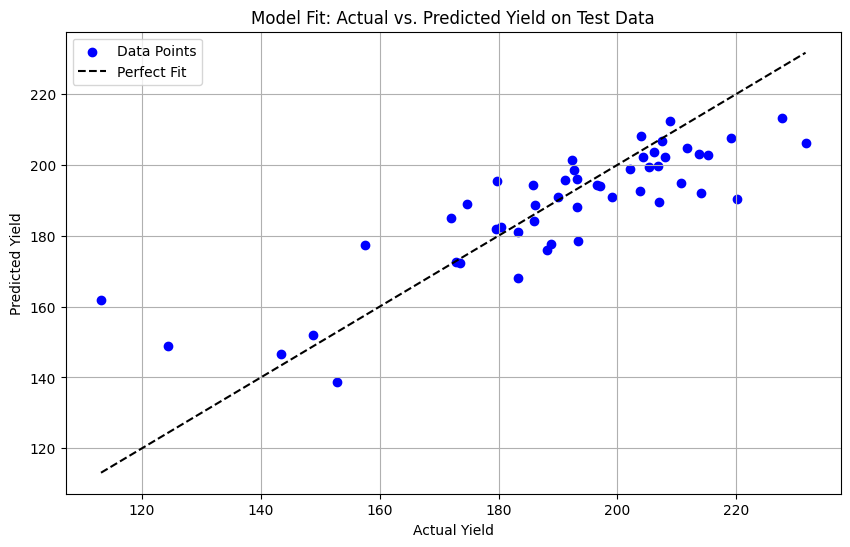

In [ ]:
import torch
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Define the testing function
def evaluate_model(nn_model, test_loader, county_year_pairs, batch_size):
    nn_model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_targets = []
    results = []

    with torch.no_grad():
        for i, (weather_seq, topo_features, soil_features, target) in enumerate(test_loader):
            # Move data to GPU
            weather_seq = weather_seq.to(device)
            topo_features = topo_features.to(device)
            soil_features = soil_features.to(device)
            target = target.to(device)

            # Get model prediction
            outputs = nn_model(weather_seq, topo_features, soil_features)

            # Collect predictions and true targets
            all_preds.extend(outputs.cpu().numpy().flatten())
            all_targets.extend(target.cpu().numpy().flatten())

            # Track the county-year pairs for each batch
            batch_county_years = county_year_pairs[i * batch_size : (i + 1) * batch_size]
            results.extend(list(zip(batch_county_years, outputs.cpu().numpy().flatten(), target.cpu().numpy().flatten())))

    return results, np.array(all_preds), np.array(all_targets)

# Run the evaluation function on the test set
test_results, test_preds, test_targets = evaluate_model(model, test_loader, test_county_years, batch_size)

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(test_results, columns=['County-Year', 'Predicted Yield', 'Actual Yield'])

# Display or save the results
print(results_df)
results_df.to_csv("Datasets/test_predictions_with_county_year.csv", index=False)

# Compute final test metrics
test_mse, test_mae, test_mape, test_r2 = compute_metrics(torch.tensor(test_targets), torch.tensor(test_preds))
print("\nFinal Test Metrics:")
print(f"Test - MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, MAPE: {test_mape:.2f}%, R2: {test_r2:.4f}")

# Plot Predicted vs Actual Yields
plt.figure(figsize=(10, 6))
plt.scatter(test_targets, test_preds, label='Data Points', color='blue')
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], 'k--', label='Perfect Fit')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Model Fit: Actual vs. Predicted Yield on Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def evaluate_model(model, test_loader, county_year_pairs):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_targets = []
    results = []

    with torch.no_grad():
        for i, (weather_seq, topo_features, soil_features, target) in enumerate(test_loader):
            # Move data to GPU
            weather_seq = weather_seq.to(device)
            topo_features = topo_features.to(device)
            soil_features = soil_features.to(device)
            target = target.to(device)

            # Get model prediction
            outputs = model(weather_seq, topo_features, soil_features)

            # Collect predictions and true targets
            all_preds.extend(outputs.cpu().numpy().flatten())
            all_targets.extend(target.cpu().numpy().flatten())

            # Track the county-year pairs for each batch
            batch_county_years = county_year_pairs[i * batch_size : (i + 1) * batch_size]
            results.extend(list(zip(batch_county_years, outputs.cpu().numpy().flatten(), target.cpu().numpy().flatten())))

    return results, all_preds, all_targets


            County-Year  Predicted Yield  Actual Yield
0         (WAYNE, 2021)       189.581558    206.974594
1        (ORANGE, 2005)       188.607010    186.071396
2          (CASS, 2022)       194.208038    196.637299
3        (HOWARD, 2021)       206.301010    231.674606
4         (HENRY, 2006)       194.009750    197.134094
5    (WASHINGTON, 2002)       161.971512    113.083298
6        (HOWARD, 2020)       190.496216    220.111893
7        (JASPER, 2022)       184.054138    186.037292
8        (FULTON, 2009)       198.597046    192.722198
9       (HANCOCK, 2023)       199.577866    206.899994
10        (WAYNE, 2014)       203.665390    206.235703
11     (LA PORTE, 2019)       177.466858    157.449203
12  (VANDERBURGH, 2009)       195.004471    210.722198
13      (WHITLEY, 2011)       146.646164    143.347595
14      (JOHNSON, 2014)       202.125351    207.935699
15     (LA PORTE, 2021)       189.071625    174.674606
16       (DUBOIS, 2013)       192.583649    203.873001
17   (TIPP

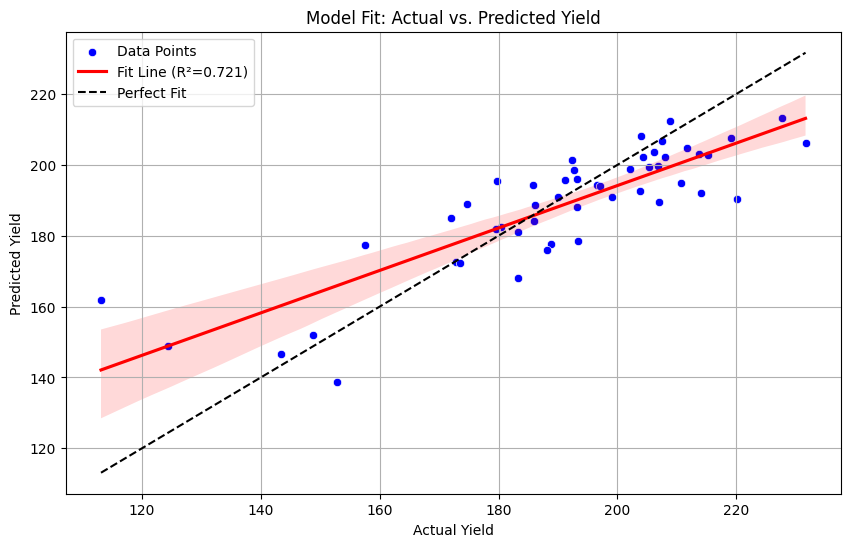

In [ ]:
test_results, test_preds, test_targets = evaluate_model(model, test_loader, test_county_years)

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(test_results, columns=['County-Year', 'Predicted Yield', 'Actual Yield'])

# Display or save the results
print(results_df)
results_df.to_csv("Datasets/test_predictions_with_county_year.csv", index=False)


import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming 'test_preds' and 'test_targets' contain the predictions and actual values for the test set
# And that they are both lists or 1D arrays
y_pred_with_const = sm.add_constant(test_preds)

# Fit the OLS model to calculate R-squared
modelols = sm.OLS(test_targets, y_pred_with_const).fit()
r_squared = modelols.rsquared
# Calculate R-squared
# r_squared = r2_score(test_targets, test_preds)

# Plotting Predicted vs Actual with R-squared
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_targets, y=test_preds, label='Data Points', color='blue')
sns.regplot(x=test_targets, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r_squared:.3f})')

# Add a reference line for perfect predictions
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], 'k--', label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Model Fit: Actual vs. Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Datasets/test_predictions_with_county_year.csv")
df

,County-Year,Predicted Yield,Actual Yield
0,"('WAYNE', 2021)",189.58156,206.9746
1,"('ORANGE', 2005)",188.60701,186.0714
2,"('CASS', 2022)",194.20804,196.6373
3,"('HOWARD', 2021)",206.30101,231.6746
4,"('HENRY', 2006)",194.00975,197.1341
5,"('WASHINGTON', 2002)",161.97151,113.0833
6,"('HOWARD', 2020)",190.49622,220.1119
7,"('JASPER', 2022)",184.05414,186.0373
8,"('FULTON', 2009)",198.59705,192.7222
9,"('HANCOCK', 2023)",199.57787,206.9000


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


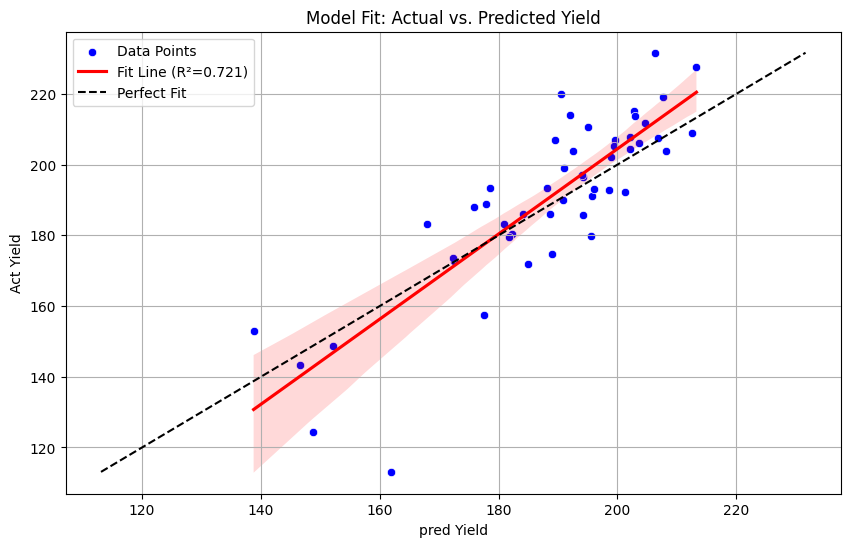

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming 'test_preds' and 'test_targets' contain the predictions and actual values for the test setfrom
test_targets = df['Actual Yield'].values
test_preds = df['Predicted Yield'].values

y_pred_with_const = sm.add_constant(test_preds)

# Fit the OLS model to calculate R-squared
modelols = sm.OLS(test_targets, y_pred_with_const).fit()
r_squared = modelols.rsquared

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_preds, y=test_targets, label='Data Points', color='blue')
sns.regplot(x=test_preds, y=test_targets, scatter=False, color='red', label=f'Fit Line (R²={r_squared:.3f})')

# Add a reference line for perfect predictions
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], 'k--', label='Perfect Fit')

# Labels and title
plt.xlabel('pred Yield')
plt.ylabel('Act Yield')
plt.title('Model Fit: Actual vs. Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
torch.save(model.state_dict(), 'models/multimodel_lstm.pth')

In [ ]:
model

YieldPredictionModel(
  (weather_lstm): WeatherLSTM(
    (lstm1): LSTM(5, 128, num_layers=2, batch_first=True)
    (lstm2): LSTM(128, 64, num_layers=2, batch_first=True)
    (fc): Linear(in_features=64, out_features=32, bias=True)
  )
  (topo_ffn): TopologyFeedForward(
    (fc1): Linear(in_features=18, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=8, bias=True)
    (relu): ReLU()
  )
  (fc1): Linear(in_features=51, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.01, inplace=False)
)

## Load the model and evaluate

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
county_year_pairs = []

# Extract inputs and target from dictionaries and yield data
weather_inputs, topo_inputs, soil_inputs, targets = [], [], [], []

# Align features and yield values by common county-year pairs
for _, row in yield_data_filtered.iterrows():
    county, year = row['county'], row['year']

    # Check if all required data are available for the county-year pair
    if (county, year) in weather_sequences and (county, year) in topo_features_dict and county in soil_data_dict:
        weather_inputs.append(weather_sequences[(county, year)])  # Sequence data (153 days, features)
        topo_inputs.append(list(topo_features_dict[(county, year)].values()))  # Topo features
        soil_inputs.append(list(soil_data_dict[county].values()))  # Soil features
        targets.append(row['Value'])  # Yield as target
        county_year_pairs.append((county, year))

# Convert lists to tensors and move data to GPU
weather_inputs = torch.tensor(np.array(weather_inputs), dtype=torch.float32).to(device)
topo_inputs = torch.tensor(np.array(topo_inputs), dtype=torch.float32).to(device)
soil_inputs = torch.tensor(np.array(soil_inputs), dtype=torch.float32).to(device)
targets = torch.tensor(np.array(targets), dtype=torch.float32, requires_grad=False).unsqueeze(1).to(device)  # Shape (N, 1)

# Dataset and DataLoader preparation
batch_size = 32
dataset = TensorDataset(weather_inputs, topo_inputs, soil_inputs, targets)

# Train-Val-Test Split

train_dsize =  len(dataset) - 50
train_size = int(0.8 * train_dsize)
val_size = train_dsize - train_size
test_size = 50
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_indices = train_dataset.indices
val_indices = val_dataset.indices
test_indices = test_dataset.indices

train_county_years = [county_year_pairs[i] for i in train_indices]
val_county_years = [county_year_pairs[i] for i in val_indices]
test_county_years = [county_year_pairs[i] for i in test_indices]

# Validate by printing or inspecting the resulting lists
print("Train county-year pairs:", train_county_years)
print("Validation county-year pairs:", val_county_years)
print("Test county-year pairs:", test_county_years)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Train county-year pairs: [('SHELBY', 2009), ('VANDERBURGH', 2003), ('MONROE', 2017), ('PERRY', 2003), ('RUSH', 2018), ('VERMILLION', 2011), ('CASS', 2014), ('RANDOLPH', 2014), ('ORANGE', 2010), ('SCOTT', 2006), ('VANDERBURGH', 2007), ('ADAMS', 2013), ('DELAWARE', 2002), ('MADISON', 2006), ('RANDOLPH', 2020), ('DECATUR', 2017), ('WHITLEY', 2012), ('NEWTON', 2005), ('BOONE', 2018), ('MONROE', 2002), ('HENRY', 2008), ('JAY', 2011), ('MORGAN', 2001), ('BLACKFORD', 2001), ('FOUNTAIN', 2002), ('SHELBY', 2010), ('MORGAN', 2009), ('NOBLE', 2003), ('WHITE', 2015), ('RUSH', 2022), ('DAVIESS', 2014), ('GIBSON', 2006), ('VERMILLION', 2014), ('CASS', 2022), ('JENNINGS', 2006), ('LAKE', 2015), ('OWEN', 2009), ('ORANGE', 2018), ('FRANKLIN', 2004), ('WABASH', 2015), ('WABASH', 2003), ('PERRY', 2006), ('FRANKLIN', 2002), ('HENRY', 2005), ('MADISON', 2014), ('PORTER', 2007), ('MARION', 2019), ('RIPLEY', 2017), ('FRANKLIN', 2011), ('PARKE', 2002), ('LAWRENCE', 2007), ('POSEY', 2014), ('CLINTON', 2018), (

<ipython-input-106-c6a4e6fa70d5>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/yield_classification/models/multi

            County-Year  Predicted Yield  Actual Yield
0      (MARSHALL, 2014)       204.460815    204.335693
1       (PULASKI, 2019)       182.195480    170.349197
2          (PIKE, 2009)       186.814880    187.722198
3         (HENRY, 2006)       194.009750    197.134094
4          (KNOX, 2006)       200.652481    192.334106
5          (VIGO, 2017)       186.629959    200.723801
6        (GIBSON, 2010)       173.006989    185.384903
7        (MONROE, 2007)       174.392273    187.796799
8      (LAGRANGE, 2009)       148.555878    168.722198
9          (RUSH, 2009)       216.892685    217.722198
10         (KNOX, 2005)       196.593338    199.771393
11       (FULTON, 2003)       193.407379    191.445999
12         (LAKE, 2020)       179.225815    178.311905
13       (TIPTON, 2021)       205.605698    229.474594
14     (HAMILTON, 2012)       132.856964    147.610306
15       (GIBSON, 2003)       185.890060    183.445999
16        (WHITE, 2006)       200.589890    199.534103
17       (

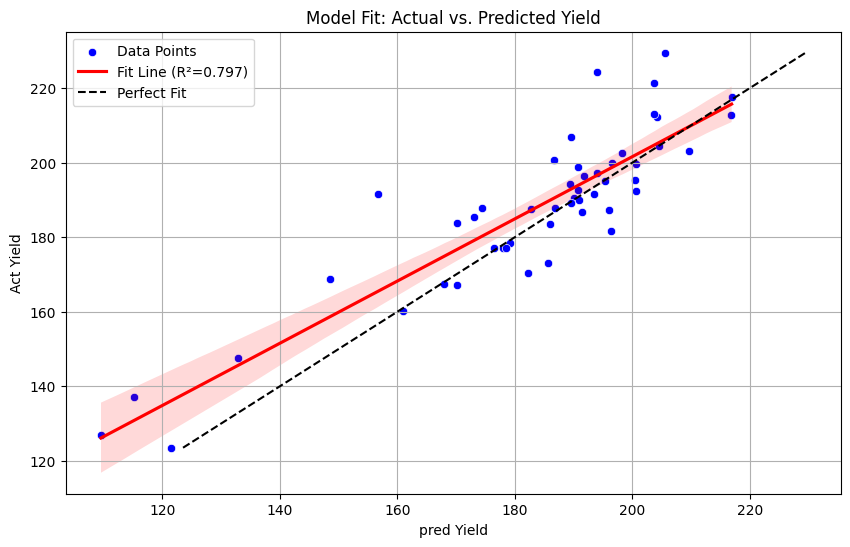

In [ ]:
# Parameters from training
weather_input_dim = weather_inputs.shape[2]
weather_hidden_dim = 128
lstm_output_dim = 32
topo_input_dim = 18
topo_hidden_dim = 16
topo_output_dim = 8
soil_input_dim = 11


final_output_dim = 1

# Load the model
model = YieldPredictionModel(weather_input_dim, weather_hidden_dim, lstm_output_dim,
                             topo_input_dim, topo_hidden_dim, topo_output_dim,
                             soil_input_dim, final_output_dim)
model.load_state_dict(torch.load('models/multimodel_lstm.pth'))
model.eval()

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

test_results, test_preds, test_targets = evaluate_model(model, test_loader, test_county_years)

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(test_results, columns=['County-Year', 'Predicted Yield', 'Actual Yield'])

# Display or save the results
print(results_df)
results_df.to_csv("Datasets/test_predictions_with_county_year.csv", index=False)


import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming 'test_preds' and 'test_targets' contain the predictions and actual values for the test set
# And that they are both lists or 1D arrays
y_pred_with_const = sm.add_constant(test_preds)

# Fit the OLS model to calculate R-squared
modelols = sm.OLS(test_targets, y_pred_with_const).fit()
r_squared = modelols.rsquared

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_preds, y=test_targets, label='Data Points', color='blue')
sns.regplot(x=test_preds, y=test_targets, scatter=False, color='red', label=f'Fit Line (R²={r_squared:.3f})')

# Add a reference line for perfect predictions
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], 'k--', label='Perfect Fit')

# Labels and title
plt.xlabel('pred Yield')
plt.ylabel('Act Yield')
plt.title('Model Fit: Actual vs. Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
soil_inputs.shape[1]

11